<a href="https://colab.research.google.com/github/Hautzy/2DMapGenerator/blob/master/exercise_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 01

by Julian Hautzmayer k11904007

$$f(x)=x^4+x^3-7x^2-x+6$$

## Problem 1


In [187]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return x**4+x**3-7*x**2-x+6

for i in range(-4, 4):
  print('f({0})={1}'.format(i, f(i)))

f(-4)=90
f(-3)=0
f(-2)=-12
f(-1)=0
f(0)=6
f(1)=0
f(2)=0
f(3)=48


(a) So we get that $$f(x)=0$$ at $$x_0=-3, x_1=-1, x_2=1, x_3=2$$

(b) The drawing:

From the drawing I expect three stationary points at approximately -2.2, -0.1 and 1.5.

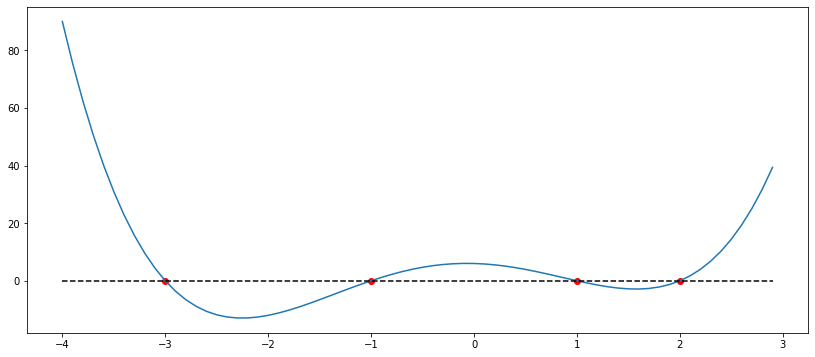

In [188]:
x = np.arange(-4, 3, 0.1)
y = f(x)
plt.figure(figsize=(14, 6))
plt.plot(x, y)
plt.plot(x, 0*x, 'k--')
plt.scatter([-3, -1, 1, 2], [0, 0, 0, 0], color='red')
plt.show()

(c)

$$
f'(x)=4x^3+3x^2-14x-1 \\
f'(x)=0 \\
x_0=-2.2537, x_1=1.5742, x_2=-0.070465
$$

These are our thress stationary points:

$$
S_1=(-2.2537, -12.949), S_2=(1.5742, -2.879), S_3=(-0.070465, 6.035)
$$

## Problem 2

In [189]:
import decimal

def d1f(x):
  return 4*x**3+3*x**2-14*x-1

def rec_approximation(x0, n=10):
  x = list ()
  x0 = decimal.Decimal(x0)
  print('Starting from x0={0}'.format(x0))
  for i in range(n):
    x.append(x0)
    x0 -= d1f(x0)
    print('x{0}={1}'.format((i+1), x0))
  x.append(x0)
  print('---')
  return x

(a) It doesn't really makes a difference if you approach the point from the left or the right side. So + und - are both allowed. But different results will be achieved, also when taking different starting points.

(b) In the following I start with $x_0=(-1, 0, 1, 1.5743, -2.2538)$. We instantly see that if our starting point is close to a stationary point we go in its direction for a couple of iterations, but after some time regardless of starting point all go to $\infty$ or $- \infty$.

In [190]:
rec_approximation(-1)
rec_approximation(0)
rec_approximation(1)
st = 1.5743
rec_approximation(st)
st = -2.2538
app_x = rec_approximation(st)

Starting from x0=-1
x1=-13
x2=8087
x3=-2115741335413
x4=3.788329137114463925999678032E+37
x5=-2.174718776527326476848110347E+113
x6=4.114047521058738699923035260E+340
x7=-2.785273858122345849282325628E+1022
x8=8.642983826910428142271075648E+3067
x9=-2.582563997016418960723287436E+9204
x10=6.889905547784326560308705928E+27613
---
Starting from x0=0
x1=1
x2=9
x3=-3023
x4=110475631737
x5=-5.393360776374217315000168250E+33
x6=6.275356580362719433670003812E+101
x7=-9.884966839702805062500583624E+305
x8=3.863542034235464526465059064E+918
x9=-2.306837040283125130171664337E+2756
x10=4.910330676087324550727878052E+8269
---
Starting from x0=1
x1=9
x2=-3023
x3=110475631737
x4=-5.393360776374217315000168250E+33
x5=6.275356580362719433670003812E+101
x6=-9.884966839702805062500583624E+305
x7=3.863542034235464526465059064E+918
x8=-2.306837040283125130171664337E+2756
x9=4.910330676087324550727878052E+8269
x10=-4.735787541090206563289755692E+24809
---
Starting from x0=1.57430000000000003268496584496460

(c) Here is the drawing for the starting point $x_0=-2.2538$

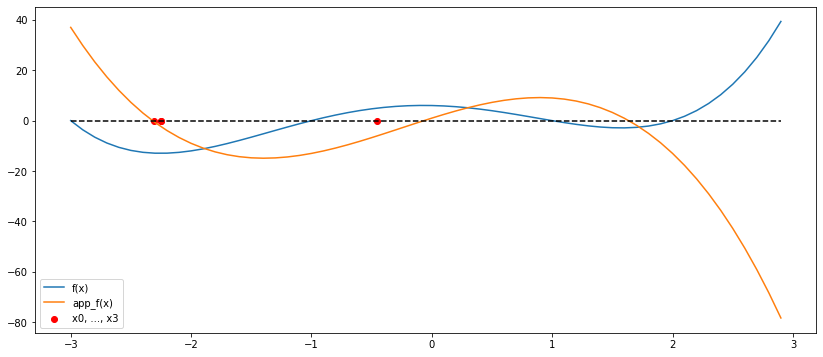

In [191]:
def app_f(x):
  return x - d1f(x)

x = np.arange(-3, 3, 0.1)
y = f(x)

dy = app_f(x)

plt.figure(figsize=(14, 6))
plt.plot(x, y, label='f(x)')
plt.plot(x, dy, label='app_f(x)')
plt.plot(x, 0*x, 'k--')
plt.scatter(app_x[:4], [0, 0, 0, 0], color='red', label='x0, ..., x3')
plt.legend()
plt.show()

(d) Starting near a stationary point helps in the first few iterations to come closer, however after some iterations is explodes and diverges to $\infty$ or $-\infty$.

## Problem 3

(a) $$f''(x)=12x^2+6x-14$$

(b) 
$$
f'''(x)=24x+6 \\
f^{IV}(x)=24
$$
We want to find the stationary point of $f''(x)$:
$$
f''(x)=0 \\
24x+6=0 \\
24x=-6 \\
x_0=-\frac{1}{4} \\

f^{IV}(-\frac{1}{4})=24 > 0 \\
$$
$\rightarrow MIN=(-\frac{1}{4}, -\frac{59}{4})$  is a global minimum ($s=-\frac{59}{4}=-14.75$)

(c) We can ignore the only stationary point of $f''(x)$ as it is a global minimum. So we have to look at the start and end of our interval -3 and 2. From this we get that $f''(-3)=76$ and $f''(2)=46$. So we can say that the maximum of $f''(x)$ in $[-3, 2]$ is $MAX=(-3, 76)$. ($t=76$)

(d) $\mu=\max\{|s|, |t|\}=76$

## Problem 4

(a) the reasoning is pretty similar, it doesn't matter if we approach our minimum or maximum from the left or right side. However it matters from which point we start.

In [192]:
mu = 76

def grad_desc(x):
  return x-(1/mu)*d1f(x)

def iterative_grad_desc(x, n=10):
  seq = list()
  print('x0={0}'.format(x))
  for i in range(n):
    seq.append(x)
    x = grad_desc(x)
    print('x{0}={1}'.format(i+1, x))
  seq.append(x)
  print('---')
  return seq

In [193]:
app_x_0 = iterative_grad_desc(-1)
app_x_2 = iterative_grad_desc(0)
app_x_1 = iterative_grad_desc(1)
st = 1.5743
iterative_grad_desc(st)
st = -2.2538
_ = iterative_grad_desc(st)

x0=-1
x1=-1.1578947368421053
x2=-1.329250466156644
x3=-1.5070870473652336
x4=-1.681046218327217
x5=-1.8390779550454912
x6=-1.9708297955858343
x7=-2.0711452543171354
x8=-2.1412382722758405
x9=-2.186798468908185
x10=-2.214845762609327
---
x0=0
x1=0.013157894736842105
x2=0.028732658205507935
x3=0.04714957445750975
x4=0.06889964716460657
x5=0.09454497960131672
x6=0.1247217295746239
x7=0.16013853541935785
x8=0.20156721764767388
x9=0.24982109715685394
x10=0.30571448794078254
---
x0=1
x1=1.1052631578947367
x2=1.2027378549888352
x3=1.2887796545919648
x4=1.361117107819969
x5=1.4191576520647222
x6=1.4638076499705495
x7=1.4969512515741503
x8=1.5208575329756409
x9=1.5377254567789267
x10=1.5494351643314008
---
x0=1.5743
x1=1.5742714344785789
x2=1.5742523355035039
x3=1.5742395656214514
x4=1.5742310273556124
x5=1.574225318402904
x6=1.5742215011943892
x7=1.5742189488627472
x8=1.5742172422714882
x9=1.5742161011740614
x10=1.5742153381882396
---
x0=-2.2538
x1=-2.2537776739541053
x2=-2.253765169028999
x3=

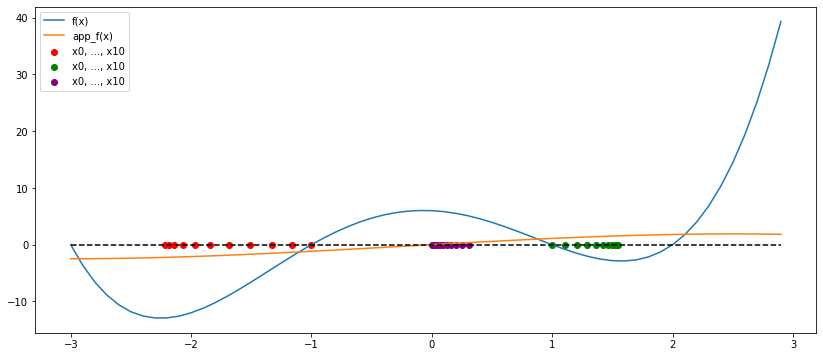

In [194]:
def app_f(x):
  return x - (1/mu)*d1f(x)

x = np.arange(-3, 3, 0.1)
y = f(x)

dy = app_f(x)

plt.figure(figsize=(14, 6))
plt.plot(x, y, label='f(x)')
plt.plot(x, dy, label='app_f(x)')
plt.plot(x, 0*x, 'k--')
plt.scatter(app_x_0, np.zeros(shape=len(app_x_0)), color='red', label='x0, ..., x10')
plt.scatter(app_x_1, np.zeros(shape=len(app_x_1)), color='green', label='x0, ..., x10')
plt.scatter(app_x_2, np.zeros(shape=len(app_x_2)), color='purple', label='x0, ..., x10')
plt.legend()
plt.show()

(d) This time there was not really a difference if I started from very close to the stationary point or a bit more away. But what I found is that for the stationary point around ~-0.07 gradient descent seems to step over the stationary point and doesn't really converge like for the other two stationary points. I wasn't able to find a good starting point. I think this is due to the too big learning rate $\frac{1}{\mu}$.

From the above method (gradient desent) I get following approximation of my stationary points (note that $S_2$ was very hard to approximate and I wasn't able to find a suitable approximation so I took the calculus result):

$S_1=(-2.25375, -12.949), S_2=(-0.0704, 6.035), S_3=(1.57421, -2.879)$